# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [1]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 7/8

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [3]:
feat_df <- read.table("../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [4]:
head(feat_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,TFDR_R5neg.Naive,TFDR_R5pos.Naive,TFDR_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10005,362.1607,59.85,56.96,63.00,9716,7971863,1.0,0.89,553,6,0.0000000,712074.3,1.0000000,NA,0.0000000,860490.3,19.32215,17.68319,19.34045,-1.6389550,0.01830805,1.65726304,17.4216760,0.003170222,0.02086623,0.005417521,0.9982244,0.005127861,0.0474435,1,0.02923725,19.66657,19.01277,19.28709,17.68319,17.68319,17.68319,18.68319,19.47935,19.85883,NA,NA,NA
F10015,296.9425,53.54,50.65,55.65,8137,45604739,0.8,0.90,3729,19,0.0000000,639860.0,0.6666667,247029,0.0000000,1915439.3,19.02161,17.54998,20.49799,-1.4716270,1.47638417,2.94801120,13.8958783,0.005597852,0.02827235,0.086349193,0.0854230,0.004521396,0.2623614,1,0.02749508,20.08540,18.76799,18.21144,18.22707,17.21144,17.21144,20.59919,20.80727,20.08752,21.41660,21.52271,21.49107
F10051,297.0818,24.64,21.49,26.74,8141,18781489,1.0,0.99,229,21,0.0000000,1359339.7,0.0000000,1113708,0.0000000,1231958.7,20.28177,20.39196,19.89904,0.1101873,-0.38273096,-0.49291825,4.7506986,0.057988412,0.12919182,0.795826539,0.1351597,0.058863696,0.9448309,1,0.13965009,20.41379,20.36101,20.07052,20.31642,20.19594,20.66352,19.74872,20.10360,19.84481,21.62776,21.86602,21.45040
F10055,362.9256,53.54,50.65,55.65,9727,1190152067,0.8,0.89,10246,24,0.0000000,49415361.7,0.0000000,11720798,0.0000000,139323217.3,25.36708,23.33422,26.68040,-2.0328592,1.31332274,3.34618193,10.0132631,0.012251948,0.04625361,0.079393292,0.2657568,0.010378615,0.2497149,1,0.04465705,26.20289,25.02777,24.87057,24.88123,22.87881,22.24261,26.83909,26.93214,26.26998,27.58698,27.72694,27.62164
F10064,297.1326,26.22,23.85,29.37,8143,4680991,1.0,1.00,510,6,0.6666667,493549.0,0.3333333,1148254,0.0000000,1629294.0,18.26046,19.57221,20.05474,1.3117445,1.79427166,0.48252718,2.0185185,0.213617668,0.31116677,0.390021540,0.2077485,0.863705268,0.6334596,1,0.95465788,18.92713,17.92713,17.92713,19.89468,17.92713,20.89481,19.21692,21.31301,19.63428,NA,NA,NA
F10083,297.2417,25.17,22.80,27.01,8147,61885891,1.0,1.00,371,18,0.0000000,912381.0,0.6666667,1391054,0.6666667,2680708.0,19.58229,18.98048,18.99901,-0.6018108,-0.58327978,0.01853103,0.1900062,0.831743035,0.86515013,0.854168634,0.8621659,0.999846446,0.9878553,1,1.00000000,19.17536,20.48820,19.08333,18.08333,18.08333,20.77480,20.83039,18.08333,18.08333,23.20271,23.25330,23.62045


In [5]:
meta_df <- read.table("../../input/sequence_file/clean_deduplicated_meta_df.csv",
                     header = TRUE, sep = ',', row.names = 1)

In [6]:
head(meta_df,5)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687


In [7]:
sample_names = colnames(feat_df)[grepl('Naive\\_[0-9]+|R5pos\\_[0-9]+|R5neg\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "Naive_1" "Naive_2" "Naive_3" "R5neg_1" "R5neg_2" "R5neg_3" "R5pos_1"
[8] "R5pos_2" "R5pos_3"

[1] 9

[1] "padj"              "Tpadj_R5neg.Naive" "Tpadj_R5pos.Naive"
[4] "Tpadj_R5pos.R5neg"

In [8]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

# Define filtering level - FDR control

In [9]:
filtered_level = 0.01
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [10]:
dim(feat_df.filt)

[1] 285  43

## subset datatable with only data values

In [11]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [12]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [13]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.849739  1.990837

#### columns and rows annotation

In [14]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

In [15]:
unique(meta_df$class)

[1] "Naive" "R5neg" "R5pos"

## Since the metadata is not exclusively the data 

In [16]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [17]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'class') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [18]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'class')

In [19]:
annotation_col = data.frame(class = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [20]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [21]:
annotation_col$class

[1] "Naive" "Naive" "Naive" "R5neg" "R5neg" "R5neg" "R5pos" "R5pos" "R5pos"

#### Annotation of rows (here don't have these)

In [22]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [23]:
class = c("#888888","#0000ff","#ff0000")
names(class) = c("Naive","R5pos","R5neg")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [24]:
ann_colors = list(class = class)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [25]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.849739  1.990837

In [26]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [27]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.849739  1.990837

In [28]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [29]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [30]:
out_dir = "../../output/hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/heatmap/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

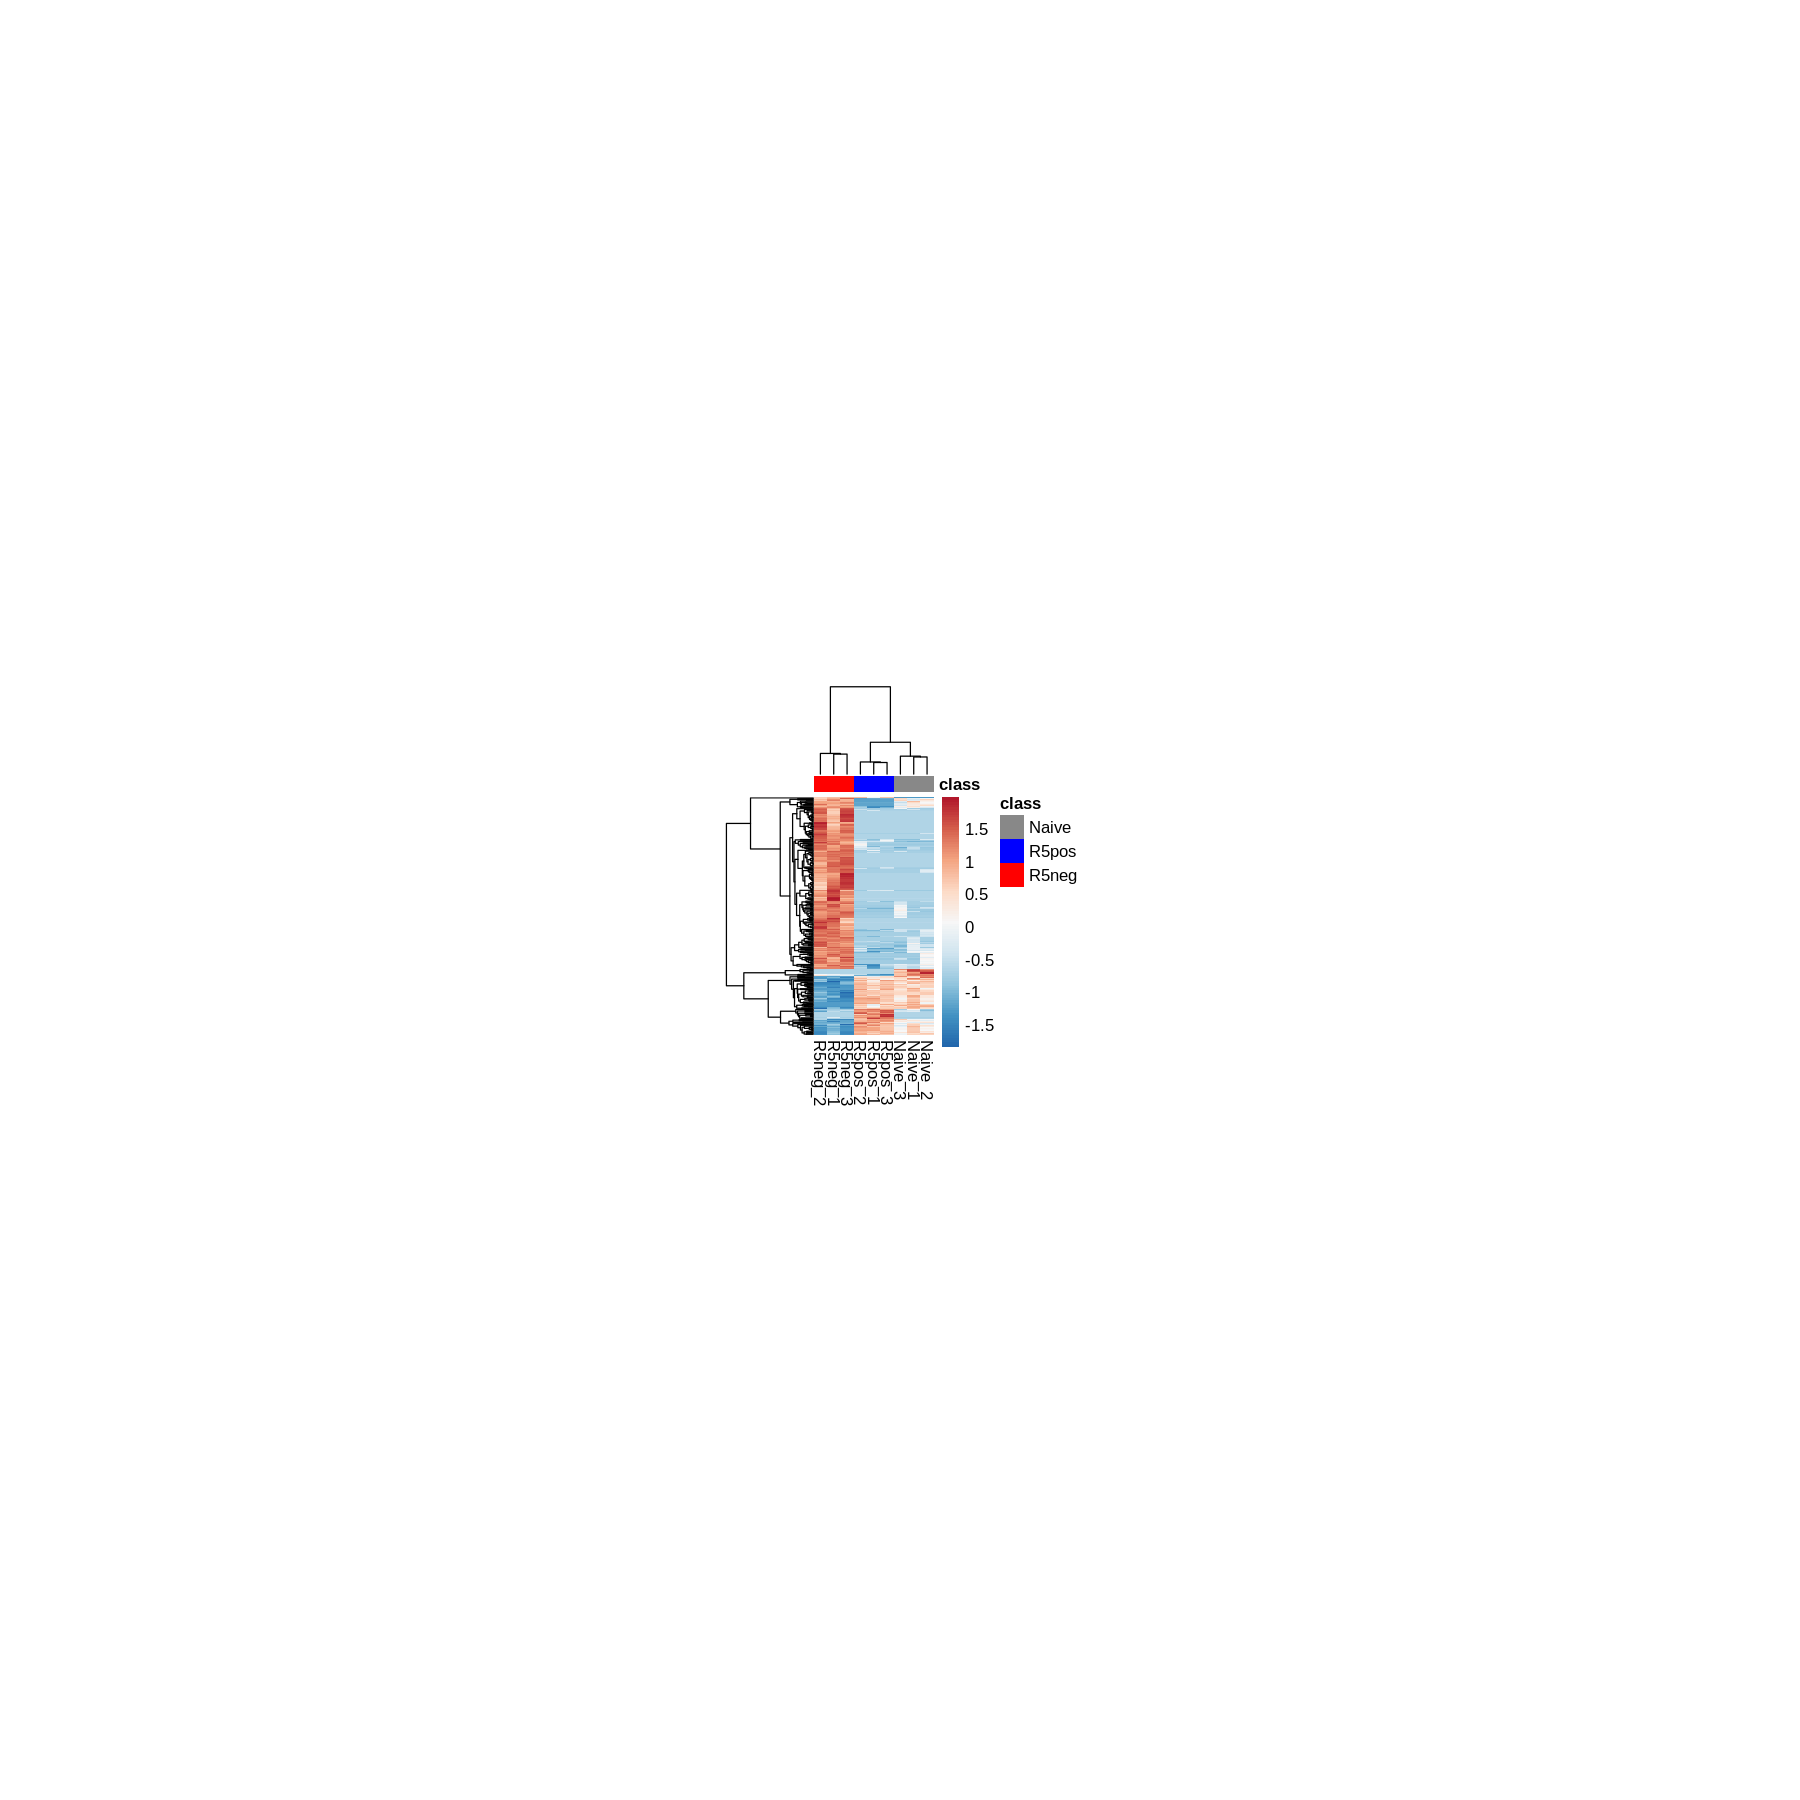

In [31]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = FALSE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 0.5,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----